In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_path='D:/Ramazan/ЗАГРУЗКИ/ECG_images_dataset/secondCase/training_set'
valid_path='D:/Ramazan/ЗАГРУЗКИ/ECG_images_dataset/secondCase/validation_set'
test_path='D:/Ramazan/ЗАГРУЗКИ/ECG_images_dataset/secondCase/testing_set'

In [3]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['abnormal', 'normal'], batch_size=32)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=['abnormal', 'normal'], batch_size=32)
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['abnormal', 'normal'], batch_size=32)

Found 192 images belonging to 2 classes.
Found 192 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims= np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

In [6]:
vgg16_model = keras.applications.vgg16.VGG16()

In [7]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
type(vgg16_model)

keras.engine.functional.Functional

In [9]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)    

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [11]:
for layer in model.layers:
    layer.trainable = False

In [12]:
model.add(Dense(2, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
model.compile(Adam(learning_rate=.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(train_batches, steps_per_epoch=6, validation_data=valid_batches, validation_steps=6, epochs=30, verbose=2)

Epoch 1/30
6/6 - 144s - loss: 9.6333 - accuracy: 0.4948 - val_loss: 3.4906 - val_accuracy: 0.5833 - 144s/epoch - 24s/step
Epoch 2/30
6/6 - 135s - loss: 3.4317 - accuracy: 0.6406 - val_loss: 1.7864 - val_accuracy: 0.7396 - 135s/epoch - 23s/step
Epoch 3/30
6/6 - 128s - loss: 1.9636 - accuracy: 0.7500 - val_loss: 0.7804 - val_accuracy: 0.8333 - 128s/epoch - 21s/step
Epoch 4/30
6/6 - 103s - loss: 1.5035 - accuracy: 0.8073 - val_loss: 2.9379 - val_accuracy: 0.7083 - 103s/epoch - 17s/step
Epoch 5/30
6/6 - 113s - loss: 1.5751 - accuracy: 0.8281 - val_loss: 1.2908 - val_accuracy: 0.7917 - 113s/epoch - 19s/step
Epoch 6/30
6/6 - 115s - loss: 1.4874 - accuracy: 0.8177 - val_loss: 1.1444 - val_accuracy: 0.8438 - 115s/epoch - 19s/step
Epoch 7/30
6/6 - 102s - loss: 0.7039 - accuracy: 0.8854 - val_loss: 0.5094 - val_accuracy: 0.8698 - 102s/epoch - 17s/step
Epoch 8/30
6/6 - 135s - loss: 0.4629 - accuracy: 0.9010 - val_loss: 0.4773 - val_accuracy: 0.8906 - 135s/epoch - 22s/step
Epoch 9/30
6/6 - 131s - 

In [16]:
test_imgs, test_labels = next(test_batches)

In [17]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0.],
      dtype=float32)

In [18]:
predictions = model.predict(test_batches, steps = 1, verbose = 0)
predictions

array([[9.9919087e-01, 8.0908410e-04],
       [7.0208444e-07, 9.9999923e-01],
       [1.4807611e-03, 9.9851924e-01],
       [5.1657689e-06, 9.9999481e-01],
       [9.9990684e-01, 9.3122224e-05],
       [1.2955287e-02, 9.8704469e-01],
       [8.2343956e-03, 9.9176556e-01],
       [2.4082359e-02, 9.7591758e-01],
       [2.7458158e-03, 9.9725419e-01],
       [1.1159118e-01, 8.8840878e-01],
       [9.9909198e-01, 9.0802670e-04],
       [8.6449212e-01, 1.3550781e-01],
       [1.8655302e-01, 8.1344688e-01],
       [4.4341919e-01, 5.5658084e-01],
       [6.6355242e-05, 9.9993354e-01],
       [1.9687041e-08, 9.9999994e-01],
       [9.8459023e-01, 1.5409743e-02],
       [9.9999923e-01, 7.2768205e-07],
       [9.9883300e-01, 1.1670503e-03],
       [9.9999970e-01, 2.2528620e-07],
       [9.9773186e-01, 2.2681260e-03],
       [9.9999934e-01, 6.4134548e-07],
       [1.3445620e-05, 9.9998647e-01],
       [9.8425341e-01, 1.5746595e-02],
       [9.9446845e-01, 5.5315676e-03],
       [9.0224457e-01, 9.

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [20]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[16  1]
 [ 1 14]]


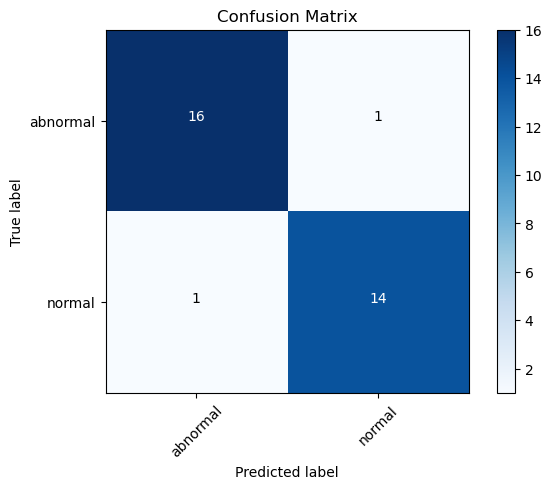

In [21]:
cm_plot_labels = ['abnormal', 'normal']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')